## Fitting grades example: Does the linear regression depend on which variable we choose to assign to the x-axis (independent variable) and the y-axis (dependent variable)?

In this notebook we use the two data arrays x and y that contain the sample data:

* x contains the third exam score
* y contains the final exam score 

<P style="background-color:orange;font-size:130%">
<BR>
For consistency with the actual visual line fitting activity in class, please set the logical variable
class_compatible=True. The full sample data is shown and used in the regression analysis if set False.
<BR>
<BR>
</P>


In [13]:
class_compatible=False

In [14]:
%matplotlib inline

In [15]:
import matplotlib.pylab as plt
import numpy as np
from scipy import stats
import matplotlib
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 
#change the style
plt.style.use("ggplot")

x=np.array([ 65, 67, 71, 71, 66, 75, 67, 70, 71, 69, 69])
y=np.array([175,133,185,163,126,198,153,163,159,151,159])
if class_compatible:
    # 2019-04-25 the visual regression line fit did not have the point with the largest x-value
    use_for_fitting=[v < 75 for v in x]# short code to create list with True False
    print ("class activity settings are applied")
    x_limits=[-5,5]
else:
    use_for_fitting=[ True for v in x]
    x_limits=[-7,7]
print (x[use_for_fitting])
print (y[use_for_fitting])

# center data
x=x-np.mean(x)
y=y-np.mean(y)

# for the team activity the scaling provides better numerical values 
# to work with

y=y/3

[65 67 71 71 66 75 67 70 71 69 69]
[175 133 185 163 126 198 153 163 159 151 159]


## Linear regression with scipy package
It can be done with scipy's stats.linregress function.

### (1) Third grade exam scores as independent variable and final exam score as dependent variable

In [16]:
#stats.linregress(x,y)
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(x[use_for_fitting],y[use_for_fitting])
print("final score= %12.4f + %12.4f * third exam score" %(intercept1, slope1))
print("correlation: %10.6f" % (r_value1))
print("p-value: %8.6f" %(p_value1))


final score=       0.0000 +       1.6091 * third exam score
correlation:   0.663094
p-value: 0.026150


In [17]:
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(y[use_for_fitting],x[use_for_fitting])
print("third exam score = %12.4f + %12.4f * final exam score" %(intercept2, slope2))
print("correlation: %10.6f" % (r_value2))
print("p-value: %8.6f" %(p_value2))
# check the reciprocal relationship between the two slopes
print ("testing the slope product                  b1*b2=", slope1*slope2)
print ("compare that to coefficient of determination r^2=", r_value2**2)

third exam score =      -0.0000 +       0.2732 * final exam score
correlation:   0.663094
p-value: 0.026150
testing the slope product                  b1*b2= 0.4396931104246353
compare that to coefficient of determination r^2= 0.4396931104246354


## Create a scatterplot with the regression lines

/kt11/ktyle/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


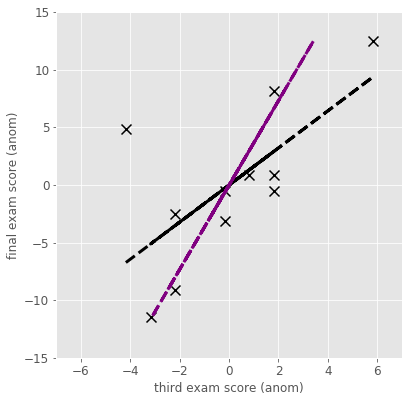

In [18]:
# Change the default plot style
# You can see what styles are available with print(plt.style.available)
show_fitted_line=True
fig=plt.figure(figsize=(6,6))
# add a new coordinate system 
# relative units
left=0.1
bottom=0.1
width=0.8
height=0.8

ax=fig.add_axes([left,bottom,width,height])
ax.scatter(x,y,marker='x',s=100,c='black')
if show_fitted_line:
    yhat1=slope1*x+intercept1
    xhat2=slope2*y+intercept2
    ax.plot(x,yhat1,linestyle='dashed',linewidth=3,color='black',label='fitted final exam')
    ax.plot(xhat2,y,linestyle='dashed',linewidth=3,color='purple',label='inverted fitted third exam')
ax.set_xlabel("third exam score (anom)",fontsize=12)
ax.set_ylabel("final exam score (anom)",fontsize=12)
ax.set_xlim(x_limits)
ax.set_ylim(-15,15)
fig.show()

## Summary

In linear regression we have to pay attention to the role of the two variables. The slope of the fitted regression line is given by the ratio of the standard deviations in the two samples multiplied with the correlation coefficient:

A fitted line for the situation 

$y=a + b\,x +\epsilon_1$ 

is given by

$\large \hat{b}= r\,\frac{s_y}{s_x}$

with $r$ the correlation coefficient, $s_x$ the standard deviation in the independent variable, and $s_y$ the standard deviation in the dependent variable.

If we switched the role of the variables 

$x=c + d\,y +\epsilon_2$

we fit another line with the slope:

$\large \hat{d}=r\, \frac{s_x}{s_y}$


In many situations, but not always, the nature of the problem will guide us in deciding what is the independent variable and which variable is the dependent variable. 



---
Note: if invert the slope of this second fitted line we get: 

$\large \frac{1}{\hat{d}} = \frac{1}{r} * \frac{s_y}{s_x} = \frac{r}{r^2} \frac{s_y}{s_x} = \frac{1}{r^2} \hat{b}$

Or equivalently: $ \hat{b}*\hat{d} = r^2$
This shows us that the sum of squared errors principle gives different fitted lines when we plot the two lines in the same scatter plot. Only when the correlation was very close to 1 the slopes would be almost reciprocal to each other.
